In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from functools import reduce
from itertools import combinations

from scipy import stats

# configure pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Input: 0 or 1

In [2]:
home = 0
powerTrans = 0

In [3]:
if home:
    dpath = '/Users/cglab/projects/abcd/data/abcd5.1-rser/'
else:
    dpath = '/home/cglab/projects/abcd/data/abcd5.1-rser/'

In [4]:
# functions
def scale(vec):
    mu = np.mean(vec)
    sigma = np.std(vec)
    return (vec - mu) / sigma

### Get items reposnses for 3_year_follow_up subs in final sample size
* After cleaning other to be merged datasets

In [5]:
ders = pd.read_csv(dpath + 'abcd5.1_ders_item_scores.csv')
ders.eventname.value_counts()

eventname
3_year_follow_up_y_arm_1    9727
4_year_follow_up_y_arm_1    4499
Name: count, dtype: int64

In [6]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,ders_upset_difficulty_p,ders_upset_embarrassed_p,ders_upset_emotion_overwhelm_p,ders_upset_esteem_p,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14226.000000,14225.000000,14226.000000,14226.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000
mean,-3.852945,-3.842401,1.791227,-3.562210,-3.896106,-3.726416,0.050682,-3.666175,1.786799,1.469385,-3.208576,1.723656,-3.468682,2.357118,1.467384,1.343058,2.525868,1.760298,1.847030,1.548963,1.576942,1.960773,2.209982,1.514025,1.556485,1.622285,1.513673,1.516485,1.472056,1.409350,6.747926,6.220863,9.495923,7.092647,-14.977436,-26.014691
std,1.058379,1.075520,1.034788,1.165088,1.059444,1.067534,0.219355,1.156373,1.049575,0.796634,1.433376,1.008007,1.339047,1.181201,0.879422,0.762590,1.234392,0.994135,1.054116,0.893285,0.916127,1.103034,1.185714,0.836099,0.842357,0.884163,0.884881,0.898708,0.862085,0.768444,17.327212,3.286593,4.141235,3.290375,3.805054,6.116467
min,-5.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,-5.000000,1.000000,-5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-19.000000,4.000000,6.000000,3.000000,-20.000000,-35.000000
25%,-5.000000,-5.000000,1.000000,-4.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,-4.000000,1.000000,-5.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-6.000000,4.000000,6.000000,5.000000,-18.000000,-31.000000
50%,-4.000000,-4.000000,1.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,1.000000,1.000000,-4.000000,1.000000,-4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,8.000000,6.000000,-16.000000,-27.000000
75%,-3.000000,-3.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,2.000000,2.000000,-2.000000,2.000000,-2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16.000000,7.000000,11.000000,9.000000,-12.000000,-22.000000
max,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,5.000000,5.000000,-1.000000,5.000000,-1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,90.000000,20.000000,30.000000,15.000000,-4.000000,-7.000000


In [7]:
# standardize items
num_cols = ders.select_dtypes(include=[np.number]).columns
stand_cols = ['S' + c for c in num_cols]
ders[stand_cols] = ders[num_cols].apply(scale)

In [8]:
# load merged cleaned dataset for RSER CFA
if powerTrans:
    cfa = pd.read_csv(dpath + 'tfmri_nback_insula_subc_pfc_par_gses_sfam_nopt_delt_nopt_w1.csv', low_memory=False)
else:
    cfa = pd.read_csv(dpath + 'tfmri_nback_insula_subc_pfc_par_gses_sfam_nopt_delt_nopt_w1.csv', low_memory=False)
print(cfa.shape)

(9837, 159)


In [9]:
cfa.columns.tolist()

['src_subject_id',
 'tfmri_nback_all_224',
 'tfmri_nback_all_238',
 'tfmrinbackallsem_224',
 'tfmrinbackallsem_238',
 'tfmri_nback_all_226',
 'tfmri_nback_all_239',
 'tfmrinbackallsem_226',
 'tfmrinbackallsem_239',
 'tfmri_nback_all_223',
 'tfmri_nback_all_237',
 'tfmrinbackallsem_223',
 'tfmrinbackallsem_237',
 'tfmri_nback_all_227',
 'tfmri_nback_all_240',
 'tfmrinbackallsem_227',
 'tfmrinbackallsem_240',
 'tfmri_nback_all_216',
 'tfmri_nback_all_233',
 'tfmrinbackallsem_216',
 'tfmrinbackallsem_233',
 'eventname',
 'tfabwdp_1083',
 'tfabwdp_1157',
 'tnbasemdp_1083',
 'tnbasemdp_1157',
 'tfabwdp_1042',
 'tfabwdp_1116',
 'tfabwdp_1043',
 'tfabwdp_1117',
 'tfabwdp_1050',
 'tfabwdp_1124',
 'tnbasemdp_1050',
 'tnbasemdp_1124',
 'tfabwdp_1051',
 'tfabwdp_1125',
 'tfabwdp_1089',
 'tfabwdp_1163',
 'tnbasemdp_1051',
 'tnbasemdp_1125',
 'tnbasemdp_1089',
 'tnbasemdp_1163',
 'tfabwdp_1049',
 'tfabwdp_1123',
 'tnbasemdp_1049',
 'tnbasemdp_1123',
 'tfncr1bwdp_1049',
 'tfabwdp_1048',
 'tfabwdp_11

### Convert site_id_l to numeric
* excluding 'site' string

In [10]:
[c for c in cfa.columns if 'subject' in c]

['src_subject_id']

In [11]:
# get last two strings of label and convert to integer
cfa = cfa.assign(site_id=cfa['site_id_l'].str[-2:].astype('int'))
cfa.head(1)

,src_subject_id,tfmri_nback_all_224,tfmri_nback_all_238,tfmrinbackallsem_224,tfmrinbackallsem_238,tfmri_nback_all_226,tfmri_nback_all_239,tfmrinbackallsem_226,tfmrinbackallsem_239,tfmri_nback_all_223,tfmri_nback_all_237,tfmrinbackallsem_223,tfmrinbackallsem_237,tfmri_nback_all_227,tfmri_nback_all_240,tfmrinbackallsem_227,tfmrinbackallsem_240,tfmri_nback_all_216,tfmri_nback_all_233,tfmrinbackallsem_216,tfmrinbackallsem_233,eventname,tfabwdp_1083,tfabwdp_1157,tnbasemdp_1083,tnbasemdp_1157,tfabwdp_1042,tfabwdp_1116,tfabwdp_1043,tfabwdp_1117,tfabwdp_1050,tfabwdp_1124,tnbasemdp_1050,tnbasemdp_1124,tfabwdp_1051,tfabwdp_1125,tfabwdp_1089,tfabwdp_1163,tnbasemdp_1051,tnbasemdp_1125,tnbasemdp_1089,tnbasemdp_1163,tfabwdp_1049,tfabwdp_1123,tnbasemdp_1049,tnbasemdp_1123,tfncr1bwdp_1049,tfabwdp_1048,tfabwdp_1122,tnbasemdp_1048,tnbasemdp_1122,tfabwdp_1063,tfabwdp_1137,tnbasemdp_1063,tnbasemdp_1137,tfabwdp_1066,tfabwdp_1140,tnbasemdp_1066,tnbasemdp_1140,tfmri_nback_all_757,tfmri_nback_all_791,tfmrinbackallsem_757,tfmrinbackallsem_791,tfmri_nback_all_772,tfmri_nback_all_806,tfmrinbackallsem_772,tfmrinbackallsem_806,tfmri_nback_all_777,tfmri_nback_all_811,tfmrinbackallsem_777,tfmrinbackallsem_811,tfmri_nback_all_765,tfmri_nback_all_799,tfmrinbackallsem_765,tfmrinbackallsem_799,tfmri_nback_all_772.1,tfmri_nback_all_806.1,tfmrinbackallsem_772.1,tfmrinbackallsem_806.1,tfmri_nback_all_774,tfmri_nback_all_808,tfmrinbackallsem_774,tfmrinbackallsem_808,tfmri_nback_all_771,tfmri_nback_all_805,tfmrinbackallsem_771,tfmrinbackallsem_805,tfmri_nback_all_773,tfmri_nback_all_807,tfmrinbackallsem_773,tfmrinbackallsem_807,tfmri_nback_all_759,tfmri_nback_all_793,tfmrinbackallsem_759,tfmrinbackallsem_793,tfmri_nback_all_780,tfmri_nback_all_814,tfmrinbackallsem_780,tfmrinbackallsem_814,tfmri_nback_all_763,tfmri_nback_all_797,tfmrinbackallsem_763,tfmrinbackallsem_797,tfmri_nback_all_752,tfmri_nback_all_786,tfmrinbackallsem_752,tfmrinbackallsem_786,tfmri_nback_all_770,tfmri_nback_all_804,tfmrinbackallsem_770,tfmrinbackallsem_804,tfmri_nback_all_751,tfmri_nback_all_785,tfmrinbackallsem_751,tfmrinbackallsem_785,tfmri_nback_all_761,tfmri_nback_all_795,tfmrinbackallsem_761,tfmrinbackallsem_795,ders_aware_clar_score_3_year,ders_aware_clar_score_4_year,ders_awareness_score_3_year,ders_awareness_score_4_year,ders_goals_score_3_year,ders_goals_score_4_year,ders_impulse_score_3_year,ders_impulse_score_4_year,ders_nonaccept_score_3_year,ders_nonaccept_score_4_year,ders_total_score_3_year,ders_total_score_4_year,ders_aware_delta_4yr3,ders_awareness_delta_4yr3,ders_goals_delta_4yr3,ders_impulse_delta_4yr3,ders_nonaccept_delta_4yr3,ders_total_delta_4yr3,newThrt,FamCon1,site_id_l,rel_family_id,rel_birth_id,school_id,district_id,interview_date,interview_age,visit_type,latent_factor_ss_general_ses,latent_factor_ss_social,latent_factor_ss_perinatal,demo_gender_id_v2,rsfmri_meanmotion,tfmri_nback_all_meanmotion,scanID,imgincl_rsfmri_include,imgincl_nback_include,gender_cat,gender_dum,newThrt_sq,site_id
0,NDAR_INV003RTV85,0.212708,0.055381,0.176087,0.155525,-0.088629,0.073535,0.214742,0.183586,-0.359891,-0.082504,0.165531,0.133543,0.134395,0.192474,0.167321,0.163543,-0.048863,0.093455,0.101615,0.107676,baseline_year_1_arm_1,0.015289,-0.103441,0.148654,0.178501,-0.13254,-0.188057,0.166818,0.253223,0.192075,0.543896,0.166045,0.151626,0.191655,0.2224,0.108273,0.233236,0.131964,0.137411,0.149034,0.139927,-0.137873,0.260733,0.188592,0.226724,-0.264069,0.163448,0.206164,0.141683,0.12757,0.237258,0.238363,0.125959,0.128566,0.05117,0.035573,0.140165,0.123484,-0.066499,-0.158752,0.157818,0.163842,0.150912,0.242196,0.133146,0.135971,-0.073922,0.560933,0.153906,0.291907,0.137701,0.392173,0.149149,0.141754,0.150912,0.242196,0.133146,0.135971,0.152965,0.270374,0.118325,0.126736,-0.174577,-0.146513,0.136813,0.148129,-0.00173,0.057638,0.101406,0.090919,0.083855,0.221032,0.240966,0.316233,-0.03559,-0.014068,0.125123,0.130015,0.162832,0.217005,0.141833,0.130071,0.013436,-0.002187,0.140753,0.144071,0.

In [12]:
# get subs for year 3
ders_items = ders[(ders['src_subject_id'].isin(cfa['src_subject_id'])) & (ders['eventname']=='3_year_follow_up_y_arm_1')]
print(ders_items.shape)
ders_items.to_csv(dpath + 'abcd5.1_ders_item_3y_rser.csv', index=False)

(8153, 74)


In [13]:
ders_items.isnull().sum()

src_subject_id                     0
eventname                          0
ders_attn_awareness_p              0
ders_clear_feelings_p              0
ders_emotion_overwhelm_p           0
ders_feelings_attentive_p          0
ders_feelings_care_p               0
ders_feelings_know_p               0
ders_p_select_language___1         0
ders_upset_ack_p                   0
ders_upset_angry_p                 0
ders_upset_ashamed_p               0
ders_upset_behavior_control_p      0
ders_upset_behavior_p              0
ders_upset_better_p                0
ders_upset_concentrate_p           0
ders_upset_control_p               0
ders_upset_depressed_p             0
ders_upset_difficulty_p            0
ders_upset_embarrassed_p           0
ders_upset_emotion_overwhelm_p     0
ders_upset_esteem_p                0
ders_upset_feel_better_p           0
ders_upset_fixation_p              0
ders_upset_focus_p                 0
ders_upset_guilty_p                0
ders_upset_irritation_p            0
d

In [14]:
comb = cfa.merge(ders_items, how='left', on='src_subject_id')
comb.shape

(9837, 233)

In [15]:
[c for c in comb.columns if 'gender' in c or 'ses' in c]


['latent_factor_ss_general_ses',
 'demo_gender_id_v2',
 'gender_cat',
 'gender_dum']

In [19]:
comb['ders_aware_clar_score'].isnull().sum()

1684

### Rename Columns for ease in lavaann

In [16]:
[c for c in comb if 'sa_ngd_ca' in c]

[]

In [17]:
# check if where 'latent_factor_ss_general_ses_yr1' NaN's there are also NaNs in 'latent_factor_ss_general_ses_yr2'
comb.loc[comb['latent_factor_ss_general_ses'].isnull(), ['src_subject_id', 'latent_factor_ss_general_ses']]

,src_subject_id,latent_factor_ss_general_ses
1,NDAR_INV005V6D2C,NaN
5,NDAR_INV00HEV6HB,NaN
6,NDAR_INV00J52GPG,NaN
10,NDAR_INV00R4TXET,NaN
17,NDAR_INV01ELX9L6,NaN
...,...,...
9817,NDAR_INVZXPAWB32,NaN
9821,NDAR_INVZYFB43H7,NaN
9826,NDAR_INVZZ35KHXP,NaN
9831,NDAR_INVZZL0VA2F,NaN


In [17]:
# gender_dum_yr2 specifies the up-to-date gender values from the year 2 dataframe
rdict = dict(zip(['gender_dum', 'latent_factor_ss_general_ses'], ['Gender', 'SES']))
comb.rename(columns=rdict, inplace=True)

In [19]:
[c for c in comb.columns if 'Thrt' in c]

['newThrt', 'newThrt_sq']

In [19]:
comb['Gender'].isnull().sum()

0

### Load and merge Threat items

In [20]:
threat = pd.read_csv(dpath + 'ABCD_FamCon_5.3.24.csv')
item_cols = [c for c in threat.columns if c.startswith('Fc') and '*' not in c]# and '7' not in c and '9' not in c]
threat.rename(columns={'subid': 'src_subject_id'}, inplace=True)
# Scale numeric items
numeric_cols = threat.select_dtypes(include=[np.number]).columns
stan_cols = ['S' + c for c in numeric_cols]
threat[stan_cols] = threat[numeric_cols].apply(scale)
threat.head()

,src_subject_id,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9
0,NDAR_INV003RTV85,466.092707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604
1,NDAR_INV005V6D2C,520.488325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.486702,-0.445586,-1.007864,-0.383727,0.964582,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
2,NDAR_INV00BD7VDC,414.643009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.788189,-0.445586,0.992198,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
3,NDAR_INV00CY2MDM,1433.061575,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.112649,2.244238,0.992198,2.606020,0.964582,-0.697481,2.678070,2.838522,2.180116,1.02604
4,NDAR_INV00HEV6HB,650.876929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.115306,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462


In [21]:
stan_cols

['Sppensity',
 'SFconP1',
 'SFconP2',
 'SFconP3',
 'SFconP4',
 'SFconP5',
 'SFconP6',
 'SFconP7',
 'SFconP8',
 'SFconP9']

In [22]:
# output = list(combinations(item_cols, 2))

# for tup in output:
#     threat['.'.join(tup)] = reduce(lambda a,b: a*b, [threat[i] for i in tup])
#     threat['.'.join(tup) + '_mc'] = threat['.'.join(tup)] - threat['.'.join(tup)].mean()

In [23]:
# prod_ind_all = list()
# for i in item_cols:
#     for j in item_cols:
#         prod_ind_all.append('.'.join([i, j]) + '.1')

In [24]:
threat.head()

,src_subject_id,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9
0,NDAR_INV003RTV85,466.092707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604
1,NDAR_INV005V6D2C,520.488325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.486702,-0.445586,-1.007864,-0.383727,0.964582,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
2,NDAR_INV00BD7VDC,414.643009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.788189,-0.445586,0.992198,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
3,NDAR_INV00CY2MDM,1433.061575,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.112649,2.244238,0.992198,2.606020,0.964582,-0.697481,2.678070,2.838522,2.180116,1.02604
4,NDAR_INV00HEV6HB,650.876929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.115306,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462


##### END OLD

### Merge threat with full df

In [25]:
print(comb.shape)
combt = comb.merge(threat, how='left', on='src_subject_id')
print(combt.shape)

(9837, 233)
(9837, 253)


### Load and merge DEMOs

In [26]:
demo = pd.read_csv(dpath + 'DEMOS_5.6.24.csv')
demo.rename(columns={'subid': 'src_subject_id'}, inplace=True)
demo.head()

,src_subject_id,pedu,pedu2,income
0,NDAR_INV003RTV85,13.0,13.0,8.0
1,NDAR_INV005V6D2C,6.0,NaN,NaN
2,NDAR_INV00BD7VDC,20.0,20.0,10.0
3,NDAR_INV00CY2MDM,15.0,NaN,6.0
4,NDAR_INV00HEV6HB,13.0,NaN,NaN


In [27]:
# check missing count for pedu, pedu2, income
demo.pedu.isnull().sum(), demo.pedu2.isnull().sum(), demo.income.isnull().sum()

(27, 2474, 1027)

In [28]:
print(combt.shape)
combtd = combt.merge(demo, how='left', on='src_subject_id')
print(combtd.shape)

(9837, 253)
(9837, 256)


#### Check for missing in FAmily ID

In [29]:
combtd['rel_family_id'].isnull().sum()

(0, 0)

### Convert Gender dummy and relative family id to integer
* for model ingestion

In [30]:
combtd['Gender'] =  combtd['Gender'].astype(int)
# combtd.dropna(subset='rel_family_id_yr1', inplace=True)
combtd['rel_family_id'] =  combtd['rel_family_id'].astype(int)
combtd.Gender.dtype, combtd['rel_family_id'].dtype

(dtype('int64'), dtype('int64'))

In [31]:
combtd.shape

(9837, 256)

### Create  shorter names for SEM

In [32]:
# categorical variables that should not be standardized
cols_stry = ['src_subject_id', 'eventname', 'gender_cat', 'demo_gender_id_v2', 'demo_gender_id_v2_l', 'scanID', 'site_id_l', 'rel_family_id', 'rel_birth_id', 'school_id', 'district_id', 'interview_date', 'interview_age', 'visit_type']#, 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
# collect various variable names for correlations and variance
rs_var_nm = [c for c in combtd.columns if 'var' in c or 'mrirsfd' in c]
rs_cor_nm = [c for c in combtd.columns if 'var' not in c and c not in cols_stry and c not in rs_var_nm]
corr_cols = [c for c in combtd.columns if '_cor_' in c or '_c_' in c]
# columns for cfa's
corr_cols_cfa = [c for c in corr_cols if '/' not in c]
corr_cols_cfa += ['src_subject_id', 'newThrt', 'newThrt_sq', 'FamCon1', 'gender_dum', 'latent_factor_ss_general_ses', 'site_id_l', 'rel_family_id']
sa_cols = [c for c in combtd.columns if '_sa_' in c]
mr_var = rs_var_nm + corr_cols

In [33]:
corr_cols_cfa

['src_subject_id',
 'newThrt',
 'newThrt_sq',
 'FamCon1',
 'gender_dum',
 'latent_factor_ss_general_ses',
 'site_id_l',
 'rel_family_id']

In [34]:
corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
# create shorter variable names for viewing in R
corr_cols_cfa_sn = ['_'.join(c.split('_')[-4:]) for c in corr_cols_cfa]
rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
combtd.rename(columns=rcols, inplace=True)

In [35]:
corr_cols_cfa_sn

['src_subject_id',
 'newThrt',
 'newThrt_sq',
 'FamCon1',
 'gender_dum',
 'factor_ss_general_ses',
 'rel_family_id']

In [36]:
combtd['SES'].isnull().sum()

2907

In [37]:
# view motion for both years
# combtd[['subID', 'rsfmri_meanmotion_yr1', 'rsfmri_meanmotion_yr2']].head(20)

#### Average framewise displacement from years 1 and 2
* for models with latent change between the two years

In [38]:
[c for c in combtd.columns if 'motion' in c]

['rsfmri_meanmotion',
 'tfmri_nback_all_meanmotion',
 'ders_emotion_overwhelm_p',
 'ders_upset_emotion_overwhelm_p',
 'Sders_emotion_overwhelm_p',
 'Sders_upset_emotion_overwhelm_p']

In [44]:
#combtd['Motion'] = combtd[['tfmri_nback_all_meanmotion_yr1', 'tfmri_nback_all_meanmotion_yr2']].mean(axis=1)

### Rename variables of INterest in SEM

In [45]:
# combtd['sa_ngd_ca_yr1'].head()

#### Dictionary for renaming columns

In [39]:
sdict = {'src_subject_id': 'subID', 'scanID': 'scanID', 'rel_family_id': 'famID', 'tfmri_nback_all_meanmotion': 'MotT1', 'sa_ngd_ca': 'SaCParT1', 'ders_aware_clar_score': 'AwareER',
         'tfmri_nback_all_224': 'AmygL1',
         'tfmri_nback_all_238': 'AmygR1',
         'tfmri_nback_all_227': 'VnldcL1',
         'tfmri_nback_all_240': 'VnldcR1',
         'tfmri_nback_all_216': 'ThalL1',
         'tfmri_nback_all_233': 'ThalR1',
         'tfabwdp_1083': 'aInslaL1',
         'tfabwdp_1083': 'aInslaR1'
        }

In [40]:
combtd.rename(columns=sdict, inplace=True)

In [41]:
[c for c in combtd.columns if 'mot' in c.lower()]

['rsfmri_meanmotion',
 'MotT1',
 'ders_emotion_overwhelm_p',
 'ders_upset_emotion_overwhelm_p',
 'Sders_emotion_overwhelm_p',
 'Sders_upset_emotion_overwhelm_p']

In [57]:
[c for c in combtd.columns if 'sa_ngd' in c.lower()]

[]

In [42]:
combtd.describe()

,AmygL1,AmygR1,tfmrinbackallsem_224,tfmrinbackallsem_238,tfmri_nback_all_226,tfmri_nback_all_239,tfmrinbackallsem_226,tfmrinbackallsem_239,tfmri_nback_all_223,tfmri_nback_all_237,tfmrinbackallsem_223,tfmrinbackallsem_237,VnldcL1,VnldcR1,tfmrinbackallsem_227,tfmrinbackallsem_240,ThalL1,ThalR1,tfmrinbackallsem_216,tfmrinbackallsem_233,aInslaR1,tfabwdp_1157,tnbasemdp_1083,tnbasemdp_1157,tfabwdp_1042,tfabwdp_1116,tfabwdp_1043,tfabwdp_1117,tfabwdp_1050,tfabwdp_1124,tnbasemdp_1050,tnbasemdp_1124,tfabwdp_1051,tfabwdp_1125,tfabwdp_1089,tfabwdp_1163,tnbasemdp_1051,tnbasemdp_1125,tnbasemdp_1089,tnbasemdp_1163,tfabwdp_1049,tfabwdp_1123,tnbasemdp_1049,tnbasemdp_1123,tfncr1bwdp_1049,tfabwdp_1048,tfabwdp_1122,tnbasemdp_1048,tnbasemdp_1122,tfabwdp_1063,tfabwdp_1137,tnbasemdp_1063,tnbasemdp_1137,tfabwdp_1066,tfabwdp_1140,tnbasemdp_1066,tnbasemdp_1140,tfmri_nback_all_757,tfmri_nback_all_791,tfmrinbackallsem_757,tfmrinbackallsem_791,tfmri_nback_all_772,tfmri_nback_all_806,tfmrinbackallsem_772,tfmrinbackallsem_806,tfmri_nback_all_777,tfmri_nback_all_811,tfmrinbackallsem_777,tfmrinbackallsem_811,tfmri_nback_all_765,tfmri_nback_all_799,tfmrinbackallsem_765,tfmrinbackallsem_799,tfmri_nback_all_772.1,tfmri_nback_all_806.1,tfmrinbackallsem_772.1,tfmrinbackallsem_806.1,tfmri_nback_all_774,tfmri_nback_all_808,tfmrinbackallsem_774,tfmrinbackallsem_808,tfmri_nback_all_771,tfmri_nback_all_805,tfmrinbackallsem_771,tfmrinbackallsem_805,tfmri_nback_all_773,tfmri_nback_all_807,tfmrinbackallsem_773,tfmrinbackallsem_807,tfmri_nback_all_759,tfmri_nback_all_793,tfmrinbackallsem_759,tfmrinbackallsem_793,tfmri_nback_all_780,tfmri_nback_all_814,tfmrinbackallsem_780,tfmrinbackallsem_814,tfmri_nback_all_763,tfmri_nback_all_797,tfmrinbackallsem_763,...,imgincl_rsfmri_include,imgincl_nback_include,Gender,newThrt_sq,site_id,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,ders_upset_difficulty_p,ders_upset_embarrassed_p,ders_upset_emotion_overwhelm_p,ders_upset_esteem_p,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,AwareER,Sders_attn_awareness_p,Sders_clear_feelings_p,Sders_emotion_overwhelm_p,Sders_feelings_attentive_p,Sders_feelings_care_p,Sders_feelings_know_p,Sders_p_select_language___1,Sders_upset_ack_p,Sders_upset_angry_p,Sders_upset_ashamed_p,Sders_upset_behavior_control_p,Sders_upset_behavior_p,Sders_upset_better_p,Sders_upset_concentrate_p,Sders_upset_control_p,Sders_upset_depressed_p,Sders_upset_difficulty_p,Sders_upset_embarrassed_p,Sders_upset_emotion_overwhelm_p,Sders_upset_esteem_p,Sders_upset_feel_better_p,Sders_upset_fixation_p,Sders_upset_focus_p,Sders_upset_guilty_p,Sders_upset_irritation_p,Sders_upset_long_time_better_p,Sders_upset_lose_control_p,Sders_upset_out_control_p,Sders_upset_time_p,Sders_upset_weak_p,Sders_total_score,Sders_impulse_score,Sders_nonaccept_score,Sders_goals_score,Sders_awareness_score,Sders_aware_clar_score,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9,pedu,pedu2,income
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.

In [43]:
[c for c in combtd.columns if 'mot' in c]

['rsfmri_meanmotion',
 'ders_emotion_overwhelm_p',
 'ders_upset_emotion_overwhelm_p',
 'Sders_emotion_overwhelm_p',
 'Sders_upset_emotion_overwhelm_p']

In [44]:
[c for c in combtd.columns if 'include' in c]

['imgincl_rsfmri_include', 'imgincl_nback_include']

In [45]:
combtd['imgincl_rsfmri_include'].isnull().any()

False

### Include participants who passed Qaulity Control in ABCD preprocessing
* 'imgincl_rsfmri_include' and 'imgincl_nback_include' are provided by ABCD
* after preprocessing, raters assessed images and those receiving a 0 in these variables,
* had extremely noisey, unrecoverable data
* 1- data to include; 0- unusable
* 0 in either warrants exclusion

In [50]:
'T1: {0} subs failed Enback tfmri Image Qaulity Control'.format((combtd['imgincl_nback_include']==0).sum())

'T1: 2094 subs failed Enback tfmri Image Qaulity Control'

In [51]:
'T1: {} subs failed Resting State fMRI Image Qaulity Control'.format((combtd['imgincl_rsfmri_include']==0).sum())

'T1: 1445 subs failed Resting State fMRI Image Qaulity Control'

In [52]:
clean = combtd[(combtd['imgincl_nback_include']==1) & (combtd['imgincl_rsfmri_include']==1)]
clean.shape

(7173, 256)

In [53]:
combtd.loc[(combtd['imgincl_nback_include']==0), ['subID']]

,subID
1,NDAR_INV005V6D2C
7,NDAR_INV00LH735Y
8,NDAR_INV00LJVZK2
9,NDAR_INV00NPMHND
15,NDAR_INV019DXLU4
...,...
9817,NDAR_INVZXPAWB32
9821,NDAR_INVZYFB43H7
9827,NDAR_INVZZ3P1ZFJ
9831,NDAR_INVZZL0VA2F


In [54]:
combtd['AmygL1'].isnull().sum()

2

### Export clean DF to csv for modeling

In [55]:
if powerTrans:
    clean.to_csv(dpath + 'abcd5.1_tfmri_nback_insula_subc_net_ders_gses_sfam_thrt_demo_scl.csv', index=False)
else:
    clean.to_csv(dpath + 'abcd5.1_tfmri_nback_insula_subc_net_ders_gses_sfam_thrt_demo_noscl_nopt_w1_qc.csv', index=False)

In [40]:
[c for c in combtd.columns if 'aware_clar' in c]

['ders_aware_clar_score_3_year_yr2',
 'ders_aware_clar_score_4_year_yr2',
 'ders_aware_clar_score_3_year_yr1',
 'ders_aware_clar_score_4_year_yr1',
 'ders_aware_clar_score',
 'Sders_aware_clar_score']

In [45]:
combtd.pedu.isnull().sum(), combtd.pedu2.isnull().sum(), combtd.income.isnull().sum(), combtd.AwareER.isnull().sum(), combtd.SalCPar1.isnull().sum(), combtd.SalCPar2.isnull().sum(), combtd.FconP1.isnull().sum()

(12, 1430, 573, 756, 0, 0, 0)

In [27]:
combtd.head()

,sa_scs_aalh,sa_scs_aarh,sa_scs_aglh,sa_scs_agrh,sa_scs_bs,sa_scs_cdelh,sa_scs_cderh,sa_scs_crcxlh,sa_scs_crcxrh,sa_scs_hplh,sa_scs_hprh,sa_scs_pllh,sa_scs_plrh,sa_scs_ptlh,sa_scs_ptrh,sa_scs_thplh,sa_scs_thprh,sa_scs_vtdclh,sa_scs_vtdcrh,df_scs_aalh,df_scs_aarh,df_scs_aglh,df_scs_agrh,df_scs_bs,df_scs_cdelh,df_scs_cderh,df_scs_crcxlh,df_scs_crcxrh,df_scs_hplh,df_scs_hprh,df_scs_pllh,df_scs_plrh,df_scs_ptlh,df_scs_ptrh,df_scs_thplh,df_scs_thprh,df_scs_vtdclh,df_scs_vtdcrh,sa_ngd_ad,sa_ngd_cgc,sa_ngd_ca,sa_ngd_dt,sa_ngd_dla,sa_ngd_fo,sa_ngd_n,sa_ngd_rspltp,sa_ngd_sa,sa_ngd_smh,sa_ngd_smm,sa_ngd_vta,sa_ngd_vs,sa_ngd_body,src_subject_id,newThrt_x,newThrt_sq,FamCon1_x,Sex,SES,rel_family_id,site_id_l,site01,site02,site03,site04,site05,site06,site07,site08,site09,site10,site11,site12,site13,site14,site15,site16,site17,site18,site19,site20,site21,site22,site_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,...,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,newThrt_y,FamCon1_y,threatSQ,FconP1.FconP2,FconP1.FconP2_mc,FconP1.FconP3,FconP1.FconP3_mc,FconP1.FconP4,FconP1.FconP4_mc,FconP1.FconP5,FconP1.FconP5_mc,FconP1.FconP6,FconP1.FconP6_mc,FconP1.FconP7,FconP1.FconP7_mc,FconP1.FconP8,FconP1.FconP8_mc,FconP1.FconP9,FconP1.FconP9_mc,FconP2.FconP3,FconP2.FconP3_mc,FconP2.FconP4,FconP2.FconP4_mc,FconP2.FconP5,FconP2.FconP5_mc,FconP2.FconP6,FconP2.FconP6_mc,FconP2.FconP7,FconP2.FconP7_mc,FconP2.FconP8,FconP2.FconP8_mc,FconP2.FconP9,FconP2.FconP9_mc,FconP3.FconP4,FconP3.FconP4_mc,FconP3.FconP5,FconP3.FconP5_mc,FconP3.FconP6,FconP3.FconP6_mc,FconP3.FconP7,FconP3.FconP7_mc,FconP3.FconP8,FconP3.FconP8_mc,FconP3.FconP9,FconP3.FconP9_mc,FconP4.FconP5,FconP4.FconP5_mc,FconP4.FconP6,FconP4.FconP6_mc,FconP4.FconP7,FconP4.FconP7_mc,FconP4.FconP8,FconP4.FconP8_mc,FconP4.FconP9,FconP4.FconP9_mc,FconP5.FconP6,FconP5.FconP6_mc,FconP5.FconP7,FconP5.FconP7_mc,FconP5.FconP8,FconP5.FconP8_mc,FconP5.FconP9,FconP5.FconP9_mc,FconP6.FconP7,FconP6.FconP7_mc,FconP6.FconP8,FconP6.FconP8_mc,FconP6.FconP9,FconP6.FconP9_mc,FconP7.FconP8,FconP7.FconP8_mc,FconP7.FconP9,FconP7.FconP9_mc,FconP8.FconP9,FconP8.FconP9_mc,pedu,pedu2,income
0,0.681998,2.961071,1.211744,-1.385995,-1.168534,-0.029965,1.035489,0.602992,-0.607456,-2.195067,-0.470658,-0.522231,0.868493,-0.841938,-1.150919,0.922421,-0.141787,-0.118983,-0.612103,2.614145,1.027498,-0.275052,0.887901,0.331623,-0.743318,0.178167,-0.051363,-0.332357,-0.322244,-0.194731,0.395824,-1.971155,1.217318,0.544756,-2.089040,-0.950283,1.459010,-0.299466,-0.445077,-1.525044,-0.531866,0.581951,-0.033157,1.973971,0.273585,-0.832533,0.924028,-0.825536,1.300046,0.979049,-1.013332,0.116854,NDAR_INV003RTV85,-1.325127,0.740959,-0.064758,0,-0.234617,8781,site06,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,3_year_follow_up_y_arm_1,-1.083823,-1.076354,-0.764654,-0.375770,-1.041993,-1.193057,-0.231058,-1.153496,-0.749662,-0.589231,-1.249837,-0.717933,-1.143628,-1.148971,-0.531486,-0.449875,...,-0.660652,-0.703837,-0.580520,-0.574718,-0.547594,-0.532718,-1.428320,-0.675758,-0.844204,-1.243868,-1.057201,-1.305588,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604,-0.716,2.0,0.512656,0.449090,0.182751,0.170983,-0.096227,0.461947,0.173137,0.310787,-0.023425,0.166383,-0.064704,-1.264804,-1.390448,0.204386,-0.001298,-0.4

In [26]:
combtd.describe()

,sa_scs_aalh,sa_scs_aarh,sa_scs_aglh,sa_scs_agrh,sa_scs_bs,sa_scs_cdelh,sa_scs_cderh,sa_scs_crcxlh,sa_scs_crcxrh,sa_scs_hplh,sa_scs_hprh,sa_scs_pllh,sa_scs_plrh,sa_scs_ptlh,sa_scs_ptrh,sa_scs_thplh,sa_scs_thprh,sa_scs_vtdclh,sa_scs_vtdcrh,df_scs_aalh,df_scs_aarh,df_scs_aglh,df_scs_agrh,df_scs_bs,df_scs_cdelh,df_scs_cderh,df_scs_crcxlh,df_scs_crcxrh,df_scs_hplh,df_scs_hprh,df_scs_pllh,df_scs_plrh,df_scs_ptlh,df_scs_ptrh,df_scs_thplh,df_scs_thprh,df_scs_vtdclh,df_scs_vtdcrh,sa_ngd_ad,sa_ngd_cgc,sa_ngd_ca,sa_ngd_dt,sa_ngd_dla,sa_ngd_fo,sa_ngd_n,sa_ngd_rspltp,sa_ngd_sa,sa_ngd_smh,sa_ngd_smm,sa_ngd_vta,sa_ngd_vs,sa_ngd_body,newThrt_x,newThrt_sq,FamCon1_x,Sex,SES,rel_family_id,site_id,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,ders_upset_difficulty_p,ders_upset_embarrassed_p,ders_upset_emotion_overwhelm_p,ders_upset_esteem_p,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,newThrt_y,FamCon1_y,threatSQ,FconP1.FconP2,FconP1.FconP2_mc,FconP1.FconP3,FconP1.FconP3_mc,FconP1.FconP4,FconP1.FconP4_mc,FconP1.FconP5,FconP1.FconP5_mc,FconP1.FconP6,FconP1.FconP6_mc,FconP1.FconP7,FconP1.FconP7_mc,FconP1.FconP8,FconP1.FconP8_mc,FconP1.FconP9,FconP1.FconP9_mc,FconP2.FconP3,FconP2.FconP3_mc,FconP2.FconP4,FconP2.FconP4_mc,FconP2.FconP5,FconP2.FconP5_mc,FconP2.FconP6,FconP2.FconP6_mc,FconP2.FconP7,FconP2.FconP7_mc,FconP2.FconP8,FconP2.FconP8_mc,FconP2.FconP9,FconP2.FconP9_mc,FconP3.FconP4,FconP3.FconP4_mc,FconP3.FconP5,FconP3.FconP5_mc,FconP3.FconP6,FconP3.FconP6_mc,FconP3.FconP7,FconP3.FconP7_mc,FconP3.FconP8,FconP3.FconP8_mc,FconP3.FconP9,FconP3.FconP9_mc,FconP4.FconP5,FconP4.FconP5_mc,FconP4.FconP6,FconP4.FconP6_mc,FconP4.FconP7,FconP4.FconP7_mc,FconP4.FconP8,FconP4.FconP8_mc,FconP4.FconP9,FconP4.FconP9_mc,FconP5.FconP6,FconP5.FconP6_mc,FconP5.FconP7,FconP5.FconP7_mc,FconP5.FconP8,FconP5.FconP8_mc,FconP5.FconP9,FconP5.FconP9_mc,FconP6.FconP7,FconP6.FconP7_mc,FconP6.FconP8,FconP6.FconP8_mc,FconP6.FconP9,FconP6.FconP9_mc,FconP7.FconP8,FconP7.FconP8_mc,FconP7.FconP9,FconP7.FconP9_mc,FconP8.FconP9,FconP8.FconP9_mc,pedu,pedu2,income
count,9220.000000,9222.000000,9222.000000,9219.000000,9222.000000,9222.000000,9222.000000,9210.000000,9222.000000,9215.000000,9222.000000,9222.000000,9222.000000,9219.000000,9210.000000,9222.000000,9205.000000,9221.000000,9222.000000,9222.000000,9222.000000,9222.000000,9210.000000,9222.000000,9222.000000,9221.000000,9222.000000,9222.000000,9219.000000,9222.000000,9222.000000,9205.000000,9210.000000,9222.000000,9205.000000,9220.000000,9215.000000,9222.000000,9222.000000,9215.000000,9222.000000,9220.000000,9221.000000,9222.000000,9205.000000,9222.000000,9222.000000,9210.000000,9222.000000,9219.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,6690.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9221.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9216.000000,9222.

In [28]:
combtd.shape

(9222, 208)

In [32]:
combtd['site_id'].dtype

dtype('int64')

In [28]:
combtd['threatSQ'].isnull().any()

False

<Axes: ylabel='Frequency'>

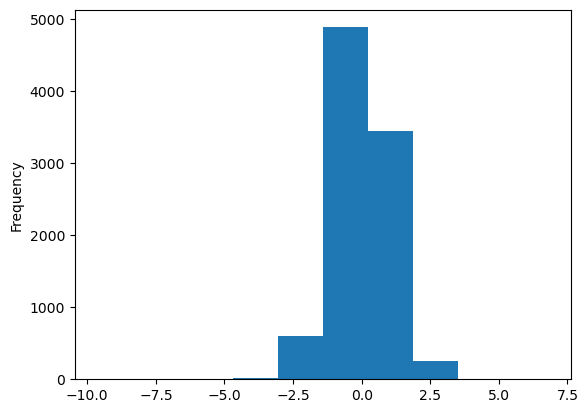

In [29]:
combtd['sa_ngd_ca'].plot.hist()

In [30]:
combtd['sa_ngd_ca'].describe()

count    9.222000e+03
mean    -8.475353e-18
std      1.000054e+00
min     -9.634130e+00
25%     -6.407275e-01
50%     -1.586307e-02
75%      6.277594e-01
max      6.797902e+00
Name: sa_ngd_ca, dtype: float64

### Generate formulas for lavaan

In [63]:
' , '.join([c for c in threat.columns if c.startswith('F') and '.' not in c])

'FconP1 , FconP2 , FconP3 , FconP4 , FconP5 , FconP6 , FconP7 , FconP8 , FconP9'

In [80]:
' + '.join([c for c in combtd.columns if c.startswith('site')])

'site01 + site02 + site03 + site04 + site05 + site06 + site07 + site08 + site09 + site10 + site11 + site12 + site13 + site14 + site15 + site16 + site17 + site18 + site19 + site20 + site21 + site22'

In [87]:
', '.join(['"'+c+'"' for c in combtd.columns if c.startswith('site') or c.startswith('Sex') or c.startswith('rel')])

'"Sex", "rel_family_id", "site01", "site02", "site03", "site04", "site05", "site06", "site07", "site08", "site09", "site10", "site11", "site12", "site13", "site14", "site15", "site16", "site17", "site18", "site19", "site20", "site21", "site22"'

In [84]:
combtd.columns.tolist()

['sa_scs_aalh',
 'sa_scs_aarh',
 'sa_scs_aglh',
 'sa_scs_agrh',
 'sa_scs_bs',
 'sa_scs_cdelh',
 'sa_scs_cderh',
 'sa_scs_crcxlh',
 'sa_scs_crcxrh',
 'sa_scs_hplh',
 'sa_scs_hprh',
 'sa_scs_pllh',
 'sa_scs_plrh',
 'sa_scs_ptlh',
 'sa_scs_ptrh',
 'sa_scs_thplh',
 'sa_scs_thprh',
 'sa_scs_vtdclh',
 'sa_scs_vtdcrh',
 'df_scs_aalh',
 'df_scs_aarh',
 'df_scs_aglh',
 'df_scs_agrh',
 'df_scs_bs',
 'df_scs_cdelh',
 'df_scs_cderh',
 'df_scs_crcxlh',
 'df_scs_crcxrh',
 'df_scs_hplh',
 'df_scs_hprh',
 'df_scs_pllh',
 'df_scs_plrh',
 'df_scs_ptlh',
 'df_scs_ptrh',
 'df_scs_thplh',
 'df_scs_thprh',
 'df_scs_vtdclh',
 'df_scs_vtdcrh',
 'sa_ngd_ad',
 'sa_ngd_cgc',
 'sa_ngd_ca',
 'sa_ngd_dt',
 'sa_ngd_dla',
 'sa_ngd_fo',
 'sa_ngd_n',
 'sa_ngd_rspltp',
 'sa_ngd_sa',
 'sa_ngd_smh',
 'sa_ngd_smm',
 'sa_ngd_vta',
 'sa_ngd_vs',
 'sa_ngd_body',
 'src_subject_id',
 'newThrt',
 'newThrt_sq',
 'FamCon1',
 'Sex',
 'SES',
 'rel_family_id',
 'site01',
 'site02',
 'site03',
 'site04',
 'site05',
 'site06',
 'site07

In [61]:
prod_ind = [c for c in threat.columns if c.startswith('Fc') and c.endswith('mc') and '7' not in c and '9' not in c]
' + '.join(prod_ind)

'FconP1.FconP2_mc + FconP1.FconP3_mc + FconP1.FconP4_mc + FconP1.FconP5_mc + FconP1.FconP6_mc + FconP1.FconP8_mc + FconP2.FconP3_mc + FconP2.FconP4_mc + FconP2.FconP5_mc + FconP2.FconP6_mc + FconP2.FconP8_mc + FconP3.FconP4_mc + FconP3.FconP5_mc + FconP3.FconP6_mc + FconP3.FconP8_mc + FconP4.FconP5_mc + FconP4.FconP6_mc + FconP4.FconP8_mc + FconP5.FconP6_mc + FconP5.FconP8_mc + FconP6.FconP8_mc'

In [109]:
output

[('FconP1', 'FconP2'),
 ('FconP1', 'FconP3'),
 ('FconP1', 'FconP4'),
 ('FconP1', 'FconP5'),
 ('FconP1', 'FconP6'),
 ('FconP1', 'FconP8'),
 ('FconP2', 'FconP3'),
 ('FconP2', 'FconP4'),
 ('FconP2', 'FconP5'),
 ('FconP2', 'FconP6'),
 ('FconP2', 'FconP8'),
 ('FconP3', 'FconP4'),
 ('FconP3', 'FconP5'),
 ('FconP3', 'FconP6'),
 ('FconP3', 'FconP8'),
 ('FconP4', 'FconP5'),
 ('FconP4', 'FconP6'),
 ('FconP4', 'FconP8'),
 ('FconP5', 'FconP6'),
 ('FconP5', 'FconP8'),
 ('FconP6', 'FconP8')]

In [66]:
len(output)

36

In [21]:
for tup in output:
    print(' ~~ '.join(tup))

FconP1 ~~ FconP2
FconP1 ~~ FconP3
FconP1 ~~ FconP4
FconP1 ~~ FconP5
FconP1 ~~ FconP6
FconP1 ~~ FconP7
FconP1 ~~ FconP8
FconP1 ~~ FconP9
FconP2 ~~ FconP3
FconP2 ~~ FconP4
FconP2 ~~ FconP5
FconP2 ~~ FconP6
FconP2 ~~ FconP7
FconP2 ~~ FconP8
FconP2 ~~ FconP9
FconP3 ~~ FconP4
FconP3 ~~ FconP5
FconP3 ~~ FconP6
FconP3 ~~ FconP7
FconP3 ~~ FconP8
FconP3 ~~ FconP9
FconP4 ~~ FconP5
FconP4 ~~ FconP6
FconP4 ~~ FconP7
FconP4 ~~ FconP8
FconP4 ~~ FconP9
FconP5 ~~ FconP6
FconP5 ~~ FconP7
FconP5 ~~ FconP8
FconP5 ~~ FconP9
FconP6 ~~ FconP7
FconP6 ~~ FconP8
FconP6 ~~ FconP9
FconP7 ~~ FconP8
FconP7 ~~ FconP9
FconP8 ~~ FconP9


In [23]:
pairs = list(combinations(prod_ind, 2))
for tup in pairs:
    print(' ~~ '.join(tup))

FconP1.FconP2_mc ~~ FconP1.FconP3_mc
FconP1.FconP2_mc ~~ FconP1.FconP4_mc
FconP1.FconP2_mc ~~ FconP1.FconP5_mc
FconP1.FconP2_mc ~~ FconP1.FconP6_mc
FconP1.FconP2_mc ~~ FconP1.FconP7_mc
FconP1.FconP2_mc ~~ FconP1.FconP8_mc
FconP1.FconP2_mc ~~ FconP1.FconP9_mc
FconP1.FconP2_mc ~~ FconP2.FconP3_mc
FconP1.FconP2_mc ~~ FconP2.FconP4_mc
FconP1.FconP2_mc ~~ FconP2.FconP5_mc
FconP1.FconP2_mc ~~ FconP2.FconP6_mc
FconP1.FconP2_mc ~~ FconP2.FconP7_mc
FconP1.FconP2_mc ~~ FconP2.FconP8_mc
FconP1.FconP2_mc ~~ FconP2.FconP9_mc
FconP1.FconP2_mc ~~ FconP3.FconP4_mc
FconP1.FconP2_mc ~~ FconP3.FconP5_mc
FconP1.FconP2_mc ~~ FconP3.FconP6_mc
FconP1.FconP2_mc ~~ FconP3.FconP7_mc
FconP1.FconP2_mc ~~ FconP3.FconP8_mc
FconP1.FconP2_mc ~~ FconP3.FconP9_mc
FconP1.FconP2_mc ~~ FconP4.FconP5_mc
FconP1.FconP2_mc ~~ FconP4.FconP6_mc
FconP1.FconP2_mc ~~ FconP4.FconP7_mc
FconP1.FconP2_mc ~~ FconP4.FconP8_mc
FconP1.FconP2_mc ~~ FconP4.FconP9_mc
FconP1.FconP2_mc ~~ FconP5.FconP6_mc
FconP1.FconP2_mc ~~ FconP5.FconP7_mc
F

In [67]:
', '.join(['"'+c+'"' for c in threat.columns if c.startswith('F') and '.' not in c])

'"FconP1", "FconP2", "FconP3", "FconP4", "FconP5", "FconP6", "FconP7", "FconP8", "FconP9"'

In [68]:
prod_ind = [c[:-3] + '.1' for c in threat.columns if c.startswith('Fc') and c.endswith('mc') and '7' not in c and '9' not in c]
' + '.join(prod_ind)

'FconP1.FconP2.1 + FconP1.FconP3.1 + FconP1.FconP4.1 + FconP1.FconP5.1 + FconP1.FconP6.1 + FconP1.FconP8.1 + FconP2.FconP3.1 + FconP2.FconP4.1 + FconP2.FconP5.1 + FconP2.FconP6.1 + FconP2.FconP8.1 + FconP3.FconP4.1 + FconP3.FconP5.1 + FconP3.FconP6.1 + FconP3.FconP8.1 + FconP4.FconP5.1 + FconP4.FconP6.1 + FconP4.FconP8.1 + FconP5.FconP6.1 + FconP5.FconP8.1 + FconP6.FconP8.1'

In [56]:
', '.join(['"'+c+'"' for c in ders.columns if 'ders' in c])

'"ders_attn_awareness_p", "ders_clear_feelings_p", "ders_emotion_overwhelm_p", "ders_feelings_attentive_p", "ders_feelings_care_p", "ders_feelings_know_p", "ders_p_select_language___1", "ders_upset_ack_p", "ders_upset_angry_p", "ders_upset_ashamed_p", "ders_upset_behavior_control_p", "ders_upset_behavior_p", "ders_upset_better_p", "ders_upset_concentrate_p", "ders_upset_control_p", "ders_upset_depressed_p", "ders_upset_difficulty_p", "ders_upset_embarrassed_p", "ders_upset_emotion_overwhelm_p", "ders_upset_esteem_p", "ders_upset_feel_better_p", "ders_upset_fixation_p", "ders_upset_focus_p", "ders_upset_guilty_p", "ders_upset_irritation_p", "ders_upset_long_time_better_p", "ders_upset_lose_control_p", "ders_upset_out_control_p", "ders_upset_time_p", "ders_upset_weak_p", "ders_total_score", "ders_impulse_score", "ders_nonaccept_score", "ders_goals_score", "ders_awareness_score", "ders_aware_clar_score", "Sders_attn_awareness_p", "Sders_clear_feelings_p", "Sders_emotion_overwhelm_p", "Sde

In [61]:
da = 'ders_attn_awareness_p + ders_clear_feelings_p + ders_feelings_attentive_p + ders_feelings_care_p + ders_feelings_know_p + ders_upset_ack_p + ders_upset_better_p'
aware = da.split(' + ')


In [62]:
', '.join(['"'+c+'"' for c in aware])

'"ders_attn_awareness_p", "ders_clear_feelings_p", "ders_feelings_attentive_p", "ders_feelings_care_p", "ders_feelings_know_p", "ders_upset_ack_p", "ders_upset_better_p"'